## Задание №1. Первичный анализ данных с использованием описательных статистик и визуализации

Веберите любые данные из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) и проведите их первичный анализ в соответсвии со следующей схемой. Комментарии к каждому разделу обязательны.

Импортируем необходимые библиотеки

In [29]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)

scipy: 1.3.1


In [30]:
# numpy
import numpy
print('numpy: %s' % numpy.__version__)

numpy: 1.16.5


In [31]:
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)

matplotlib: 3.1.1


In [32]:
# pandas
import pandas
print('pandas: %s' % pandas.__version__)

pandas: 0.25.1


In [33]:
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.21.3


## Посмотрим на данные

Проанализируем данные о пожарах.

In [8]:
import os
os.chdir("C:/Users/User/Desktop/homework/daata for mash learning")

In [42]:
from pandas import read_csv

filename = 'forestfires.csv' 
data = read_csv(filename)
peek = data.head(10) #10 первых записей
print(peek)

   X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.0
5  8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.0
6  8  6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.0
7  8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.0
8  8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.0
9  7  5   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.0


## Размерность данных

In [43]:
data.shape #размерность кол-во строк, кол-во столбцов

(517, 13)

## Типы данных

In [44]:
data.dtypes #типы данных в каждом столбце

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

В основном здесь представленны числовые данные (целые и плавающей точкой). В столбцах "месяц" и "день" тип данных - object.

## Описательные статистики

In [45]:
data.describe() #вывод описательных статистик

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Среднее значение почти во всех колонках +- совпадает с 50% квартилью.

## Распределение данных по классам

In [46]:
data.groupby('rain').size()

rain
0.0    509
0.2      2
0.4      1
0.8      2
1.0      1
1.4      1
6.4      1
dtype: int64

Группировка по столбцу дождь и подсчет эл-ов в каждом классе, чтобы определить влияние этого фактора на пожары. В большинстве случаев дождя не было.

In [47]:
data.groupby('month').size()

month
apr      9
aug    184
dec      9
feb     20
jan      2
jul     32
jun     17
mar     54
may      2
nov      1
oct     15
sep    172
dtype: int64

In [ ]:
Также рассмотрели в каких месяцах пожары случаются наиболее часто. Исходя из полученных данных, это конец лета - начало осени. 
По этим данным можно подготовиться к самому пожароопасному сезону в году, чаще предостерегать людей и собрать большую команду пожарных.

## Корреляция между признаками

In [48]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3) #регулировка кол-ва знаков после запятой
data.corr(method = 'pearson')#коэффициент корреляции Пирсона

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000,0.540,-0.021,-0.048,-0.086,0.006,-0.051,0.085,0.019,0.065,0.063
Y,0.540,1.000,-0.046,0.008,-0.101,-0.024,-0.024,0.062,-0.020,0.033,0.045
FFMC,-0.021,-0.046,1.000,0.383,0.331,0.532,0.432,-0.301,-0.028,0.057,0.040
DMC,-0.048,0.008,0.383,1.000,0.682,0.305,0.470,0.074,-0.105,0.075,0.073
DC,-0.086,-0.101,0.331,0.682,1.000,0.229,0.496,-0.039,-0.203,0.036,0.049
ISI,0.006,-0.024,0.532,0.305,0.229,1.000,0.394,-0.133,0.107,0.068,0.008
temp,-0.051,-0.024,0.432,0.470,0.496,0.394,1.000,-0.527,-0.227,0.069,0.098
RH,0.085,0.062,-0.301,0.074,-0.039,-0.133,-0.527,1.000,0.069,0.100,-0.076
wind,0.019,-0.020,-0.028,-0.105,-0.203,0.107,-0.227,0.069,1.000,0.061,0.012
rain,0.065,0.033,0.057,0.075,0.036,0.068,0.069,0.100,0.061,1.000,-0.007


In [ ]:
Корреляционная связь бывает прямая (при увеличении одного признака увеличивается другой) и обратная (при увеличении одного показателя другой уменьшается). 
Сильная связь выражается коэффициентом от 0,7 до 0,99, средняя — от 0,3 до 0,69, слабая — до 0,29. При нулевом значении коэффициента связи отсутствуют.

## Ассиметрия одномерных распределений

In [49]:
data.skew() #должна быть = 0 при нормальном распределении

X        0.036
Y        0.417
FFMC    -6.576
DMC      0.547
DC      -1.100
ISI      2.536
temp    -0.331
RH       0.863
wind     0.571
rain    19.816
area    12.847
dtype: float64

In [ ]:
В данном случае нет столбца с данными, которые соответствовали бы нормальному распределению. Наиболее подходящие под этот критерий являются столбцы X, Y, DMC, temp, wind.
Если значение ассиметрии >0, то ассиметрия отрицательная. Если значение ассиметрии <0, то ассиметрия положительная.

## Univariate Plots (одномерные графики распределений)

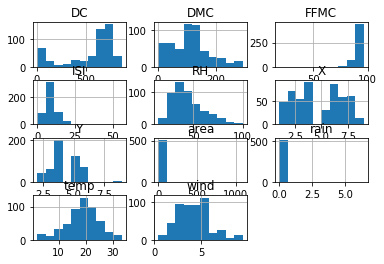

In [51]:
from matplotlib import pyplot

data.hist() #создание гистограммы
pyplot.show() #вывод на экран

In [ ]:
На графиках DC, Y присутствуют выбросы. График temp очень похож на нормальное распределение. График RH - логнормальное распределение.

### Histograms (гистограммы)

### Density Plots (ядерные оценки плотности)

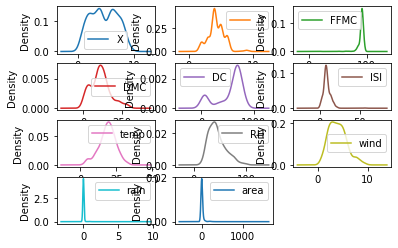

In [57]:
data.plot(kind = 'density', subplots = True, layout = (4, 3), sharex = False)
pyplot.show()

### Box and Whisker Plots (ящики с усами)

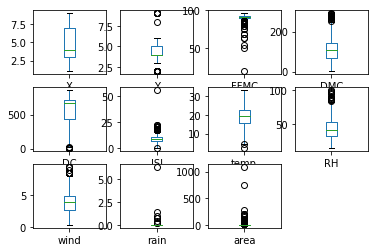

In [60]:
data.plot(kind = 'box', subplots = True, layout = (3, 4), sharex = False, sharey = False)
pyplot.show()

In [ ]:
У показателя X ассиметрия правосторонняя, т е половина наблюдений не дотянула до среднего значения, которое велико, т к есть лидеры.
У показателя DC ассиметрия левосторонняя, т е половина наблюдений превосходят среднее значение, которое мало, т к есть отстающие.

## Multivariate Plots (многомерные графики распределений)

### Correlation Matrix Plot (коррелограмма)

AttributeError: 'Figure' object has no attribute 'colobar'

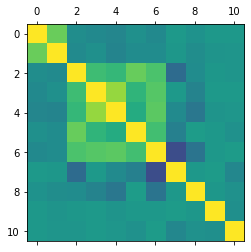

In [61]:
import numpy
correlations = data.corr(method = 'pearson') #коэффициент корреляции Пирсона

#разные коэффициенты корелляции между разными признаками
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colobar(cax)
ticks = numpy.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

### Scatter Plot Matrix (диаграмма рассеяния)

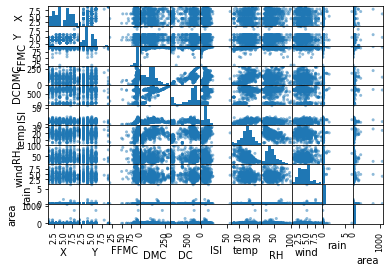

In [62]:
from pandas.plotting import scatter_matrix

scatter_matrix(data)
pyplot.show()